<a href="https://colab.research.google.com/github/Nantakxrn007/Data-Exploration-and-Preprocessing/blob/main/home_dsi310_week02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas sqlalchemy requests

In [1]:
import requests
import os
import sqlite3

In [ ]:
def download_file(url, filename):
   """
   Downloads a file from a given URL and saves it with the specified filename.

   Args:
       url (str): The URL of the file to download.
       filename (str): The name to save the file as.
   """
   # Check if the file already exists to avoid re-downloading
   if os.path.exists(filename):
       print(f"'{filename}' already exists. Skipping download.")
       return


   print(f"Downloading {filename} from {url}...")
   try:
       # Use requests to get the file content. stream=True allows for large files.
       with requests.get(url, stream=True) as r:
           r.raise_for_status()  # Raise an exception for bad status codes (4xx or 5xx)
           with open(filename, 'wb') as f:
               # Write the file content in chunks to save memory
               for chunk in r.iter_content(chunk_size=8192):
                   f.write(chunk)
       print(f"Successfully downloaded and saved '{filename}'.")
   except requests.exceptions.RequestException as e:
       print(f"Error downloading '{filename}': {e}")
   except Exception as e:
       print(f"An unexpected error occurred: {e}")


def list_tables(db_file):
   """
   Connects to a SQLite database and prints a list of all tables.

   Args:
       db_file (str): The path to the SQLite database file.
   """
   print("-" * 30)
   print(f"Listing tables in '{db_file}':")
   try:
       # Connect to the database
       conn = sqlite3.connect(db_file)
       cursor = conn.cursor()

       # Execute the query to find all tables in the database
       cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
       tables = cursor.fetchall()

       if tables:
           for table in tables:
               print(f"- {table[0]}")
       else:
           print("No tables found in this database.")

       # Close the connection
       conn.close()
   except sqlite3.Error as e:
       print(f"SQLite error: {e}")
   except Exception as e:
       print(f"An unexpected error occurred: {e}")
   finally:
       print("-" * 30)


# Define the URLs for the databases. These are direct links to the raw files on GitHub.
CHINOOK_URL = "https://raw.githubusercontent.com/lerocha/chinook-database/master/ChinookDatabase/DataSources/Chinook_Sqlite.sqlite"
# Updated URL for the Northwind database to resolve the 404 error
NORTHWIND_URL = "https://github.com/jpwhite3/northwind-SQLite3/raw/main/dist/northwind.db"


# Define the desired filenames
chinook_filename = "chinook.db"
northwind_filename = "northwind.db"


# --- Main script execution ---


# Download the databases
download_file(CHINOOK_URL, chinook_filename)
download_file(NORTHWIND_URL, northwind_filename)


print("\nAll download operations complete. Checking your current directory for the database files.")


# List the tables in each database
list_tables(chinook_filename)
list_tables(northwind_filename)

In [ ]:
from sqlalchemy import create_engine
import pandas as pd

# Create an SQLAlchemy engine for the Chinook database
chinook_engine = create_engine("sqlite:///chinook.db", echo=False)

# A connection can be explicitly opened and closed
chinook_conn = chinook_engine.connect()

# Or, as a best practice, use a 'with' statement for automatic resource management
with chinook_engine.connect() as conn:
    print("Connection to Chinook database established successfully.")
    # All database operations would happen here
    pass

chinook_conn.close() # Close the explicit connection

Connection to Chinook database established successfully.


In [ ]:
# Load the entire artists table from Chinook
chinook_artists_df = pd.read_sql_table('Artist', con=chinook_engine, )
print("\nChinook Artists DataFrame loaded successfully.")
chinook_artists_df.head()


Chinook Artists DataFrame loaded successfully.


,ArtistId,Name
0,1,AC/DC
1,2,Accept
2,3,Aerosmith
3,4,Alanis Morissette
4,5,Alice In Chains


In [ ]:
from sqlalchemy import create_engine

# Create an SQLAlchemy engine for the Northwind database
northwind_engine = create_engine("sqlite:///northwind.db", echo=False)

with northwind_engine.connect() as conn:
    print("Connection to Northwind database established successfully.")
    # All database operations would happen here
    pass


Connection to Northwind database established successfully.


In [ ]:
# Load the entire Employees table from Northwind
northwind_employees_df = pd.read_sql_table('Employees', con=northwind_engine)
print("Northwind Employees DataFrame loaded successfully.")
northwind_employees_df.head()

Northwind Employees DataFrame loaded successfully.


,EmployeeID,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1968-12-08,2012-05-01,507 - 20th Ave. E.Apt. 2A,Seattle,North America,98122,USA,(206) 555-9857,5467,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1972-02-19,2012-08-14,908 W. Capital Way,Tacoma,North America,98401,USA,(206) 555-9482,3457,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1983-08-30,2012-04-01,722 Moss Bay Blvd.,Kirkland,North America,98033,USA,(206) 555-3412,3355,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1957-09-19,2013-05-03,4110 Old Redmond Rd.,Redmond,North America,98052,USA,(206) 555-8122,5176,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1975-03-04,2013-10-17,14 Garrett Hill,London,British Isles,SW1 8JR,UK,(71) 555-4848,3453,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp


In [ ]:
artists_albums_query = """
SELECT
    T1.Name AS ArtistName,
    T2.Title AS AlbumTitle
FROM Artist AS T1
JOIN Album AS T2
    ON T1.ArtistId = T2.ArtistId
ORDER BY
    ArtistName
LIMIT 10;
"""
artists_albums_df = pd.read_sql_query(artists_albums_query, con=chinook_engine)
print("\nDataFrame of Chinook artists and their albums loaded successfully.")
artists_albums_df


DataFrame of Chinook artists and their albums loaded successfully.


,ArtistName,AlbumTitle
0,AC/DC,For Those About To Rock We Salute You
1,AC/DC,Let There Be Rock
2,Aaron Copland & London Symphony Orchestra,"A Copland Celebration, Vol. I"
3,Aaron Goldberg,Worlds
4,Academy of St. Martin in the Fields & Sir Nevi...,The World of Classical Favourites
5,Academy of St. Martin in the Fields Chamber En...,Sir Neville Marriner: A Celebration
6,"Academy of St. Martin in the Fields, John Birc...","Fauré: Requiem, Ravel: Pavane & Others"
7,"Academy of St. Martin in the Fields, Sir Nevil...",Bach: Orchestral Suites Nos. 1 - 4
8,Accept,Balls to the Wall
9,Accept,Restless and Wild


In [ ]:
print("\n--- Initial Inspection of Northwind Employees DataFrame ---")
print(f"DataFrame Shape: {chinook_artists_df.shape}\n")
print("Column Data Types:\n", chinook_artists_df.dtypes, "\n")
chinook_artists_df.info()


--- Initial Inspection of Northwind Employees DataFrame ---
DataFrame Shape: (275, 2)

Column Data Types:
 ArtistId     int64
Name        object
dtype: object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ArtistId  275 non-null    int64 
 1   Name      275 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.4+ KB


In [ ]:
chinook_artists_df.info()
chinook_artists_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ArtistId  275 non-null    int64 
 1   Name      275 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.4+ KB


,ArtistId,Name
0,1,AC/DC
1,2,Accept
2,3,Aerosmith
3,4,Alanis Morissette
4,5,Alice In Chains


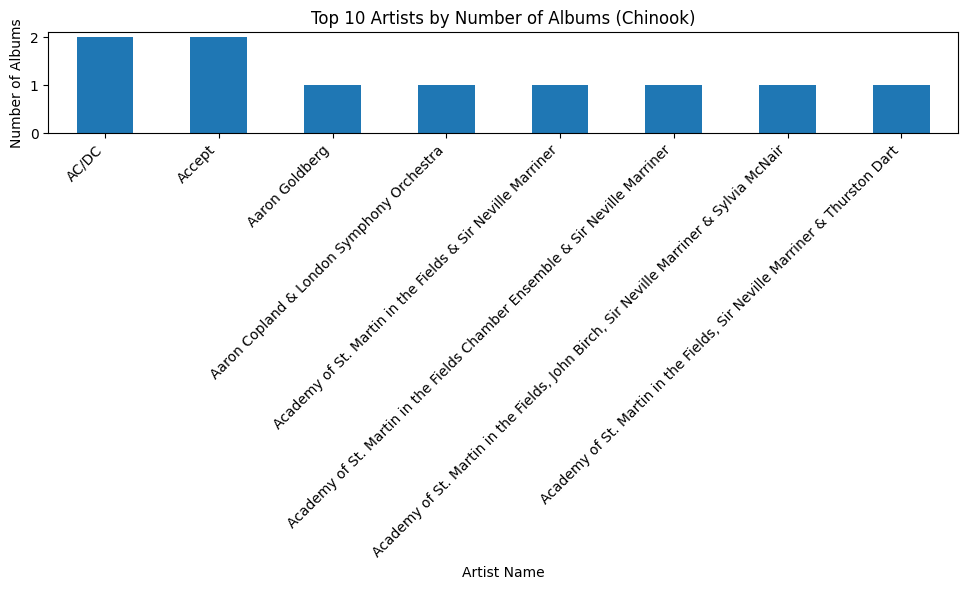

In [ ]:
import matplotlib.pyplot as plt

# Get the count of albums per artist
albums_per_artist = artists_albums_df.groupby('ArtistName').size().sort_values(ascending=False)

# Select the top 10 artists by album count
top_10_artists = albums_per_artist.head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
top_10_artists.plot(kind='bar')
plt.title('Top 10 Artists by Number of Albums (Chinook)')
plt.xlabel('Artist Name')
plt.ylabel('Number of Albums')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import requests
url = "https://raw.githubusercontent.com/lerocha/chinook-database/master/ChinookDatabase/DataSources/Chinook_Sqlite.sqlite"

ลง database ไว้ใน local

In [ ]:
filename = 'chinook_stream.db'

In [ ]:
with requests.get(url,stream=True) as r: #with เปิดแล้วปิดให้เลย
  r.raise_for_status() #เช็คว่าในเว็บถ้าขึ้น error 404 505 ไรนั้นอะให้แจ้งเตือนเลย
  with open(filename,'wb') as f: #wb binary เพราะว่า ตัวของ .db มันเป็น binary
    for chunk in r.iter_content(chunk_size=8192): #อ่านจากเว็บมา 8KB → เขียนลงไฟล์ → อ่านอีก 8KB → เขียนต่อ
      f.write(chunk)

In [ ]:
connect = sqlite3.connect('chinook_stream.db')
cursor = connect.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall() #ดึงแถวทั้งหมดใน เงื่อนไข
for table in tables:
  print(table)
else:
  print(len(tables))
cursor.close()

('Album',)
('Artist',)
('Customer',)
('Employee',)
('Genre',)
('Invoice',)
('InvoiceLine',)
('MediaType',)
('Playlist',)
('PlaylistTrack',)
('Track',)
11


SQLAlchemy = ไลบรารีสำหรับเชื่อมต่อ DB แบบ generic (ทำงานได้กับ SQLite, MySQL, PostgreSQL ฯลฯ)

In [ ]:
from sqlalchemy import create_engine
import pandas as pd

# Create an SQLAlchemy engine for the Chinook database
chinook_engine = create_engine("sqlite:///chinook_stream.db", echo=False) #True = show log command


#วิธีเช็คว่า connect ได้มั้ย
#วิธีแรก
# A connection can be explicitly opened and closed
chinook_conn = chinook_engine.connect()
chinook_conn.close() # Close the explicit connection

#วิธีที่สอง
# Or, as a best practice, use a 'with' statement for automatic resource management
with chinook_engine.connect() as conn:
    print("Connection to Chinook database established successfully.")
    # All database operations would happen here
    pass

Connection to Chinook database established successfully.


In [ ]:
# Load the entire artists table from Chinook
chinook_artists_df = pd.read_sql_table('Artist', con=chinook_engine) #choose table
print("\nChinook Artists DataFrame loaded successfully.")
chinook_artists_df


Chinook Artists DataFrame loaded successfully.


,ArtistId,Name
0,1,AC/DC
1,2,Accept
2,3,Aerosmith
3,4,Alanis Morissette
4,5,Alice In Chains
...,...,...
270,271,"Mela Tenenbaum, Pro Musica Prague & Richard Kapp"
271,272,Emerson String Quartet
272,273,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
273,274,Nash Ensemble


In [ ]:
artists_albums_query = """
SELECT
    T1.Name AS ArtistName,
    T2.Title AS AlbumTitle
FROM Artist AS T1
JOIN Album AS T2
    ON T1.ArtistId = T2.ArtistId
ORDER BY
    ArtistName
LIMIT 10;
"""
artists_albums_df = pd.read_sql_query(artists_albums_query, con=chinook_engine)
artists_albums_df

,ArtistName,AlbumTitle
0,AC/DC,For Those About To Rock We Salute You
1,AC/DC,Let There Be Rock
2,Aaron Copland & London Symphony Orchestra,"A Copland Celebration, Vol. I"
3,Aaron Goldberg,Worlds
4,Academy of St. Martin in the Fields & Sir Nevi...,The World of Classical Favourites
5,Academy of St. Martin in the Fields Chamber En...,Sir Neville Marriner: A Celebration
6,"Academy of St. Martin in the Fields, John Birc...","Fauré: Requiem, Ravel: Pavane & Others"
7,"Academy of St. Martin in the Fields, Sir Nevil...",Bach: Orchestral Suites Nos. 1 - 4
8,Accept,Balls to the Wall
9,Accept,Restless and Wild


การบ้าน

In [4]:
import requests
CHINOOK_url = "https://raw.githubusercontent.com/lerocha/chinook-database/master/ChinookDatabase/DataSources/Chinook_Sqlite.sqlite"
NORTHWIND_URL = "https://github.com/jpwhite3/northwind-SQLite3/raw/main/dist/northwind.db"

In [5]:
def pull(url,filename):
  with requests.get(url,stream=True) as r: #with เปิดแล้วปิดให้เลย
    r.raise_for_status() #เช็คว่าในเว็บถ้าขึ้น error 404 505 ไรนั้นอะให้แจ้งเตือนเลย
    with open(filename,'wb') as f: #wb binary เพราะว่า ตัวของ .db มันเป็น binary
      for chunk in r.iter_content(chunk_size=8192): #อ่านจากเว็บมา 8KB → เขียนลงไฟล์ → อ่านอีก 8KB → เขียนต่อ
        f.write(chunk)


In [9]:
pull(CHINOOK_url,'chinookdb.db')
pull(NORTHWIND_URL,'northwind.db')

In [31]:
connect = sqlite3.connect('chinookdb.db')
cursor = connect.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
table_chinook = []
tables = cursor.fetchall()
for table in tables:
  print(table)
  table_chinook.append(table[0])
else:
  print(len(tables))
cursor.close()

('Album',)
('Artist',)
('Customer',)
('Employee',)
('Genre',)
('Invoice',)
('InvoiceLine',)
('MediaType',)
('Playlist',)
('PlaylistTrack',)
('Track',)
11


In [32]:
from sqlalchemy import create_engine
import pandas as pd

chinook_engine = create_engine("sqlite:///chinookdb.db", echo=False) #True = show log command
with chinook_engine.connect() as conn:
    print("Connection to Chinook database established successfully.")
    pass

Connection to Chinook database established successfully.


In [57]:
def cols_name(tables):
  for table in tables:
    chinook_artists_df = pd.read_sql_table(table, con=chinook_engine)
    print('table_name:',table)
    for col in chinook_artists_df.columns:
      print(col , chinook_artists_df[col].dtype)
    print("*"*50)

cols_name(table_chinook)

table_name: Album
AlbumId int64
Title object
ArtistId int64
**************************************************
table_name: Artist
ArtistId int64
Name object
**************************************************
table_name: Customer
CustomerId int64
FirstName object
LastName object
Company object
Address object
City object
State object
Country object
PostalCode object
Phone object
Fax object
Email object
SupportRepId int64
**************************************************
table_name: Employee
EmployeeId int64
LastName object
FirstName object
Title object
ReportsTo float64
BirthDate datetime64[ns]
HireDate datetime64[ns]
Address object
City object
State object
Country object
PostalCode object
Phone object
Fax object
Email object
**************************************************
table_name: Genre
GenreId int64
Name object
**************************************************
table_name: Invoice
InvoiceId int64
CustomerId int64
InvoiceDate datetime64[ns]
BillingAddress object
BillingCity objec